# Predicting variation in EUR/USD exchange rate

First let's set the working directory and then load the data

In [330]:
import os
os.chdir("/media/dftortosa/Windows/Users/dftor/Documents/diego_docs/industry/data_incubator/capstone_project/")
os.getcwd()

'/media/dftortosa/Windows/Users/dftor/Documents/diego_docs/industry/data_incubator/capstone_project'

In [331]:
import pandas as pd
import numpy as np
eur_pricing = pd.read_csv("results/eur_pricing_data.csv.gz", compression="gzip")
eur_pricing

,date,eur_usd_rate,previous_eur_pricing,percent_change_pricing,5_days_rolling_mean_pricing,10_days_rolling_mean_pricing,60_days_rolling_mean_pricing,120_days_rolling_mean_pricing,5_days_exp_rolling_mean_pricing,10_days_exp_rolling_mean_pricing,60_days_exp_rolling_mean_pricing,120_days_exp_rolling_mean_pricing
0,1999-06-21,1.0339,1.0388,-0.471698,1.03804,1.04017,1.060603,1.092362,1.038175,1.040002,1.062343,1.087234
1,1999-06-22,1.0313,1.0339,-0.251475,1.03608,1.04040,1.060015,1.091153,1.036750,1.038892,1.061410,1.086353
2,1999-06-23,1.0280,1.0313,-0.319984,1.03450,1.03968,1.059352,1.089922,1.034933,1.037512,1.060423,1.085443
3,1999-06-24,1.0321,1.0280,0.398833,1.03320,1.03782,1.058582,1.088703,1.032622,1.035782,1.059360,1.084493
4,1999-06-25,1.0443,1.0321,1.182056,1.03282,1.03629,1.057830,1.087611,1.032448,1.035113,1.058466,1.083627
...,...,...,...,...,...,...,...,...,...,...,...,...
5905,2022-07-13,1.0067,1.0042,0.248954,1.01320,1.02734,1.054278,1.083448,1.014261,1.023942,1.055941,1.077875
5906,2022-07-14,1.0005,1.0067,-0.615874,1.01100,1.02284,1.053007,1.082417,1.011741,1.020807,1.054326,1.076699
5907,2022-07-15,1.0059,1.0005,0.539730,1.00750,1.01902,1.051537,1.081365,1.007994,1.017115,1.052562,1.075439
5908,2022-07-18,1.0131,1.0059,0.715777,1.00542,1.01536,1.050273,1.080350,1.007296,1.015076,1.051032,1.074290


In [332]:
twitter_sentiment = pd.read_csv("results/twitter_sentiment_data.csv.gz", compression="gzip")
twitter_sentiment

,date,quantile_0.1_sent_previous_7_days,quantile_0.25_sent_previous_7_days,quantile_0.35_sent_previous_7_days,quantile_0.50_sent_previous_7_days,quantile_0.65_sent_previous_7_days,quantile_0.75_sent_previous_7_days,quantile_0.9_sent_previous_7_days,mean_sent_previous_7_days,min_sent_previous_7_days,...,quantile_0.50_sent_previous_150_days,quantile_0.65_sent_previous_150_days,quantile_0.75_sent_previous_150_days,quantile_0.9_sent_previous_150_days,mean_sent_previous_150_days,min_sent_previous_150_days,max_sent_previous_150_days,sum_sent_previous_150_days,count_sent_previous_150_days,std_sent_previous_150_days
0,2008-05-22,0.06124,0.153100,0.244580,0.38180,0.381800,0.381800,0.65924,0.352180,0.0000,...,-0.04015,-0.028105,-0.020075,-0.00803,-0.040150,-0.0803,0.0000,-0.0803,2.0,0.040150
1,2008-10-05,-0.34362,-0.286350,-0.248170,-0.19090,-0.133630,-0.095450,-0.03818,-0.190900,-0.3818,...,0.42150,0.458800,0.458800,0.45880,0.353409,-0.2732,0.7184,3.8875,11.0,0.253221
2,2008-11-04,0.00000,0.000000,0.000000,0.00000,0.114700,0.344100,0.57480,0.191600,0.0000,...,-0.08895,-0.062265,-0.044475,-0.01779,-0.088950,-0.1779,0.0000,-0.1779,2.0,0.088950
3,2008-11-06,0.12645,0.316125,0.436345,0.56995,0.703555,0.724550,0.73562,0.470725,0.0000,...,0.45880,0.458800,0.458800,0.45880,0.275280,0.0000,0.4588,1.3764,5.0,0.224765
4,2008-11-07,-0.37091,-0.284450,-0.252095,-0.11315,0.000000,0.000000,0.00000,-0.163950,-0.4939,...,0.33525,0.435825,0.502875,0.60345,0.335250,0.0000,0.6705,0.6705,2.0,0.335250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4922,2022-07-12,-0.75574,-0.440400,-0.208300,0.00000,0.036120,0.381800,0.69080,-0.044121,-0.9538,...,0.00000,0.248810,0.440400,0.70582,0.035021,-0.9517,0.9348,10.9266,312.0,0.492533
4923,2022-07-13,-0.71752,-0.397175,-0.189420,0.00000,0.257605,0.433500,0.69080,0.007835,-0.9729,...,0.00000,0.278900,0.421500,0.68080,0.018820,-0.9750,0.9477,5.3824,286.0,0.508830
4924,2022-07-14,-0.76500,-0.440400,-0.273200,0.00000,0.153100,0.381800,0.65115,-0.040434,-0.9735,...,0.00000,0.128000,0.421500,0.62540,0.018880,-0.9423,0.9788,7.0990,376.0,0.453243
4925,2022-07-15,-0.72949,-0.476700,-0.273200,0.00000,0.177900,0.390950,0.68080,-0.037051,-0.9766,...,0.00000,0.318200,0.440400,0.69080,0.082902,-0.9477,0.9379,34.9019,421.0,0.457694


In [333]:
##merge all data.frames

#merge them using reduce
df_merged = pd.merge(eur_pricing, twitter_sentiment, on=['date'], how='inner')
    #leave only those rows having date in the datasets of currency value and sentiment
    #https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes
df_merged
    #note that here the previous eur pricing can be different than the eur pricing of the previous row
    #because when merging we lose days without tweet sentiment, so there is no longer continuous days

,date,eur_usd_rate,previous_eur_pricing,percent_change_pricing,5_days_rolling_mean_pricing,10_days_rolling_mean_pricing,60_days_rolling_mean_pricing,120_days_rolling_mean_pricing,5_days_exp_rolling_mean_pricing,10_days_exp_rolling_mean_pricing,...,quantile_0.50_sent_previous_150_days,quantile_0.65_sent_previous_150_days,quantile_0.75_sent_previous_150_days,quantile_0.9_sent_previous_150_days,mean_sent_previous_150_days,min_sent_previous_150_days,max_sent_previous_150_days,sum_sent_previous_150_days,count_sent_previous_150_days,std_sent_previous_150_days
0,2008-05-22,1.5755,1.5753,0.012696,1.55882,1.55088,1.555837,1.510893,1.561798,1.556847,...,-0.04015,-0.028105,-0.020075,-0.00803,-0.040150,-0.0803,0.0000,-0.0803,2.0,0.040150
1,2008-11-04,1.2820,1.2822,-0.015598,1.27820,1.27803,1.403633,1.483565,1.280703,1.289107,...,-0.08895,-0.062265,-0.044475,-0.01779,-0.088950,-0.1779,0.0000,-0.1779,2.0,0.088950
2,2008-11-06,1.2770,1.2870,-0.777001,1.28608,1.27466,1.396767,1.478813,1.283090,1.287667,...,0.45880,0.458800,0.458800,0.45880,0.275280,0.0000,0.4588,1.3764,5.0,0.224765
3,2008-11-07,1.2756,1.2770,-0.109632,1.28078,1.27426,1.393205,1.476326,1.281060,1.285727,...,0.33525,0.435825,0.502875,0.60345,0.335250,0.0000,0.6705,0.6705,2.0,0.335250
4,2008-11-10,1.2891,1.2756,1.058325,1.28076,1.27586,1.389917,1.473837,1.279240,1.283886,...,-0.21670,-0.083800,0.004800,0.13770,-0.216700,-0.6597,0.2263,-0.4334,2.0,0.443000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,2022-07-11,1.0098,1.0163,-0.639575,1.02530,1.03727,1.056847,1.085570,1.024037,1.032446,...,0.00000,0.202300,0.421500,0.70868,0.023667,-0.9612,0.9568,11.9043,503.0,0.487135
3450,2022-07-12,1.0042,1.0098,-0.554565,1.01816,1.03253,1.055547,1.084537,1.019291,1.028329,...,0.00000,0.248810,0.440400,0.70582,0.035021,-0.9517,0.9348,10.9266,312.0,0.492533
3451,2022-07-13,1.0067,1.0042,0.248954,1.01320,1.02734,1.054278,1.083448,1.014261,1.023942,...,0.00000,0.278900,0.421500,0.68080,0.018820,-0.9750,0.9477,5.3824,286.0,0.508830
3452,2022-07-14,1.0005,1.0067,-0.615874,1.01100,1.02284,1.053007,1.082417,1.011741,1.020807,...,0.00000,0.128000,0.421500,0.62540,0.018880,-0.9423,0.9788,7.0990,376.0,0.453243


Subset the data selecting only predictors

In [334]:
predictors = df_merged[[column for column in df_merged.columns if "sent_previous" in column or "previous_eur_pricing" in column or "rolling_mean" in column]]
predictors

,previous_eur_pricing,5_days_rolling_mean_pricing,10_days_rolling_mean_pricing,60_days_rolling_mean_pricing,120_days_rolling_mean_pricing,5_days_exp_rolling_mean_pricing,10_days_exp_rolling_mean_pricing,60_days_exp_rolling_mean_pricing,120_days_exp_rolling_mean_pricing,quantile_0.1_sent_previous_7_days,...,quantile_0.50_sent_previous_150_days,quantile_0.65_sent_previous_150_days,quantile_0.75_sent_previous_150_days,quantile_0.9_sent_previous_150_days,mean_sent_previous_150_days,min_sent_previous_150_days,max_sent_previous_150_days,sum_sent_previous_150_days,count_sent_previous_150_days,std_sent_previous_150_days
0,1.5753,1.55882,1.55088,1.555837,1.510893,1.561798,1.556847,1.546207,1.516178,0.06124,...,-0.04015,-0.028105,-0.020075,-0.00803,-0.040150,-0.0803,0.0000,-0.0803,2.0,0.040150
1,1.2822,1.27820,1.27803,1.403633,1.483565,1.280703,1.289107,1.392825,1.443907,0.00000,...,-0.08895,-0.062265,-0.044475,-0.01779,-0.088950,-0.1779,0.0000,-0.1779,2.0,0.088950
2,1.2870,1.28608,1.27466,1.396767,1.478813,1.283090,1.287667,1.385841,1.438681,0.12645,...,0.45880,0.458800,0.458800,0.45880,0.275280,0.0000,0.4588,1.3764,5.0,0.224765
3,1.2770,1.28078,1.27426,1.393205,1.476326,1.281060,1.285727,1.382272,1.436009,-0.37091,...,0.33525,0.435825,0.502875,0.60345,0.335250,0.0000,0.6705,0.6705,2.0,0.335250
4,1.2756,1.28076,1.27586,1.389917,1.473837,1.279240,1.283886,1.378775,1.433357,-0.55513,...,-0.21670,-0.083800,0.004800,0.13770,-0.216700,-0.6597,0.2263,-0.4334,2.0,0.443000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,1.0163,1.02530,1.03727,1.056847,1.085570,1.024037,1.032446,1.059318,1.080278,-0.66602,...,0.00000,0.202300,0.421500,0.70868,0.023667,-0.9612,0.9568,11.9043,503.0,0.487135
3450,1.0098,1.01816,1.03253,1.055547,1.084537,1.019291,1.028329,1.057695,1.079113,-0.75574,...,0.00000,0.248810,0.440400,0.70582,0.035021,-0.9517,0.9348,10.9266,312.0,0.492533
3451,1.0042,1.01320,1.02734,1.054278,1.083448,1.014261,1.023942,1.055941,1.077875,-0.71752,...,0.00000,0.278900,0.421500,0.68080,0.018820,-0.9750,0.9477,5.3824,286.0,0.508830
3452,1.0067,1.01100,1.02284,1.053007,1.082417,1.011741,1.020807,1.054326,1.076699,-0.76500,...,0.00000,0.128000,0.421500,0.62540,0.018880,-0.9423,0.9788,7.0990,376.0,0.453243


In [335]:
predictors_eur_pricing = predictors[[column for column in predictors.columns if "rolling_mean_" in column or "previous_eur_pricing" in column]]
predictors_eur_pricing

,previous_eur_pricing,5_days_rolling_mean_pricing,10_days_rolling_mean_pricing,60_days_rolling_mean_pricing,120_days_rolling_mean_pricing,5_days_exp_rolling_mean_pricing,10_days_exp_rolling_mean_pricing,60_days_exp_rolling_mean_pricing,120_days_exp_rolling_mean_pricing
0,1.5753,1.55882,1.55088,1.555837,1.510893,1.561798,1.556847,1.546207,1.516178
1,1.2822,1.27820,1.27803,1.403633,1.483565,1.280703,1.289107,1.392825,1.443907
2,1.2870,1.28608,1.27466,1.396767,1.478813,1.283090,1.287667,1.385841,1.438681
3,1.2770,1.28078,1.27426,1.393205,1.476326,1.281060,1.285727,1.382272,1.436009
4,1.2756,1.28076,1.27586,1.389917,1.473837,1.279240,1.283886,1.378775,1.433357
...,...,...,...,...,...,...,...,...,...
3449,1.0163,1.02530,1.03727,1.056847,1.085570,1.024037,1.032446,1.059318,1.080278
3450,1.0098,1.01816,1.03253,1.055547,1.084537,1.019291,1.028329,1.057695,1.079113
3451,1.0042,1.01320,1.02734,1.054278,1.083448,1.014261,1.023942,1.055941,1.077875
3452,1.0067,1.01100,1.02284,1.053007,1.082417,1.011741,1.020807,1.054326,1.076699


In [336]:
predictors_twitter = predictors[[column for column in predictors.columns if "previous_eur_pricing" not in column and "rolling_mean" not in column]]
predictors_twitter

,quantile_0.1_sent_previous_7_days,quantile_0.25_sent_previous_7_days,quantile_0.35_sent_previous_7_days,quantile_0.50_sent_previous_7_days,quantile_0.65_sent_previous_7_days,quantile_0.75_sent_previous_7_days,quantile_0.9_sent_previous_7_days,mean_sent_previous_7_days,min_sent_previous_7_days,max_sent_previous_7_days,...,quantile_0.50_sent_previous_150_days,quantile_0.65_sent_previous_150_days,quantile_0.75_sent_previous_150_days,quantile_0.9_sent_previous_150_days,mean_sent_previous_150_days,min_sent_previous_150_days,max_sent_previous_150_days,sum_sent_previous_150_days,count_sent_previous_150_days,std_sent_previous_150_days
0,0.06124,0.153100,0.244580,0.38180,0.381800,0.38180,0.65924,0.352180,0.0000,0.8442,...,-0.04015,-0.028105,-0.020075,-0.00803,-0.040150,-0.0803,0.0000,-0.0803,2.0,0.040150
1,0.00000,0.000000,0.000000,0.00000,0.114700,0.34410,0.57480,0.191600,0.0000,0.6908,...,-0.08895,-0.062265,-0.044475,-0.01779,-0.088950,-0.1779,0.0000,-0.1779,2.0,0.088950
2,0.12645,0.316125,0.436345,0.56995,0.703555,0.72455,0.73562,0.470725,0.0000,0.7430,...,0.45880,0.458800,0.458800,0.45880,0.275280,0.0000,0.4588,1.3764,5.0,0.224765
3,-0.37091,-0.284450,-0.252095,-0.11315,0.000000,0.00000,0.00000,-0.163950,-0.4939,0.0000,...,0.33525,0.435825,0.502875,0.60345,0.335250,0.0000,0.6705,0.6705,2.0,0.335250
4,-0.55513,-0.469225,-0.415225,-0.35875,-0.302275,-0.22845,-0.10686,-0.338925,-0.6124,-0.0258,...,-0.21670,-0.083800,0.004800,0.13770,-0.216700,-0.6597,0.2263,-0.4334,2.0,0.443000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,-0.66602,-0.340000,-0.077680,0.00000,0.256420,0.44040,0.70340,0.042899,-0.9564,0.9784,...,0.00000,0.202300,0.421500,0.70868,0.023667,-0.9612,0.9568,11.9043,503.0,0.487135
3450,-0.75574,-0.440400,-0.208300,0.00000,0.036120,0.38180,0.69080,-0.044121,-0.9538,0.9308,...,0.00000,0.248810,0.440400,0.70582,0.035021,-0.9517,0.9348,10.9266,312.0,0.492533
3451,-0.71752,-0.397175,-0.189420,0.00000,0.257605,0.43350,0.69080,0.007835,-0.9729,0.9583,...,0.00000,0.278900,0.421500,0.68080,0.018820,-0.9750,0.9477,5.3824,286.0,0.508830
3452,-0.76500,-0.440400,-0.273200,0.00000,0.153100,0.38180,0.65115,-0.040434,-0.9735,0.9659,...,0.00000,0.128000,0.421500,0.62540,0.018880,-0.9423,0.9788,7.0990,376.0,0.453243


In [337]:
shuffle_twitter=pd.DataFrame()
for column in predictors_twitter.columns:
    shuffle_twitter[column] = predictors_twitter[column].iloc[np.random.randint(0, predictors_twitter.shape[0]-1, predictors_twitter.shape[0])].reset_index(drop=True)
shuffle_twitter

,quantile_0.1_sent_previous_7_days,quantile_0.25_sent_previous_7_days,quantile_0.35_sent_previous_7_days,quantile_0.50_sent_previous_7_days,quantile_0.65_sent_previous_7_days,quantile_0.75_sent_previous_7_days,quantile_0.9_sent_previous_7_days,mean_sent_previous_7_days,min_sent_previous_7_days,max_sent_previous_7_days,...,quantile_0.50_sent_previous_150_days,quantile_0.65_sent_previous_150_days,quantile_0.75_sent_previous_150_days,quantile_0.9_sent_previous_150_days,mean_sent_previous_150_days,min_sent_previous_150_days,max_sent_previous_150_days,sum_sent_previous_150_days,count_sent_previous_150_days,std_sent_previous_150_days
0,-0.62570,-0.2960,0.000000,-0.2263,0.177900,0.1027,0.74300,-0.187919,-0.9673,0.9377,...,0.0000,0.44040,0.2263,0.60908,0.045550,-0.6808,0.8934,-14.7293,11.0,0.445780
1,-0.70030,-0.1154,0.000000,-0.0258,0.202300,0.2235,0.53262,0.020933,-0.4939,0.8955,...,0.0000,0.07720,0.3818,0.75988,-0.086894,-0.5859,0.9578,-3.5240,708.0,0.459537
2,-0.58405,0.0000,0.000000,0.0000,0.279425,0.5367,0.51060,0.099898,-0.9085,0.9648,...,0.0000,0.24620,0.4939,0.73510,0.260222,-0.8957,0.8176,-41.7713,142.0,0.088950
3,-0.49390,-0.2960,0.000000,0.0000,0.213100,0.1779,0.49390,0.119916,-0.9260,0.8658,...,0.0000,0.00000,0.0000,0.50322,0.214850,-0.8442,0.9246,-0.4019,72.0,0.398860
4,0.00000,0.0000,0.000000,0.0000,0.000000,0.0893,0.49260,0.072593,-0.9874,0.9740,...,-0.1737,0.07636,0.0000,0.69850,0.181480,-0.9562,0.8625,-11.7691,7.0,0.478182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,-0.44040,-0.1840,-0.282320,0.0000,0.296000,0.1531,0.45880,0.053583,-0.9360,0.9528,...,0.0000,0.00000,0.0258,0.68080,-0.038673,-0.9716,0.8126,20.5713,357.0,0.440407
3450,-0.63690,-0.2732,-0.245155,0.0000,0.000000,0.4215,0.65331,0.143254,-0.8519,0.7184,...,0.0000,0.00000,0.2553,0.70208,0.007713,-0.8555,0.8038,-49.0326,224.0,0.403914
3451,-0.40174,-0.1153,0.000000,0.0516,0.000000,0.0000,0.46528,0.051820,-0.9246,0.9505,...,0.0000,0.36120,0.2023,0.55740,-0.249977,-0.9136,0.8442,-0.0682,216.0,0.509672
3452,-0.70123,-0.3612,0.000000,0.0000,0.367200,0.3818,0.62612,0.056614,-0.8978,0.9596,...,0.0000,0.00000,0.4215,0.42150,-0.014519,-0.9136,0.9217,144.8277,421.0,0.469285


Now let's convert the response variable, which is the EUR/USD exchange rate, and the predictors to numpy arrays

In [338]:
y = df_merged["eur_usd_rate"].values
X = predictors #all predictors
X_eur_pricing = predictors_eur_pricing.values #eur pricing predictors
X_twitter = predictors_twitter.values #twitter sentiment predictors
X_shuffle_twitter = shuffle_twitter.values

In [339]:
print(y.shape)
print(X.shape)
print(X_eur_pricing.shape)
print(X_twitter.shape)
print(X_shuffle_twitter.shape)

(3454,)
(3454, 100)
(3454, 9)
(3454, 91)
(3454, 91)


## Modeling with Random Forest

We are going to calculate the predictive power of the RF models using CV. Therefore, we first obtain training-evaluation splits

In [340]:
#create 5 training-evaluation splits
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.3, random_state=6383287)

Then calculate R2 in the evaluation set of each partition considering the different sets of predictors

In [341]:
#full model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, ShuffleSplit
average_r2_full_model = np.mean(cross_val_score(estimator=RandomForestRegressor(random_state=6383287), 
                                                X=X, 
                                                y=y, 
                                                cv=shuffle_split, 
                                                scoring="r2", 
                                                n_jobs=5))
f"Average R2 of the full model on 5 evaluation sets: {average_r2_full_model}"

'Average R2 of the full model on 5 evaluation sets: 0.996028400270118'

In [342]:
#only eur pricing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
average_r2_eur_model = np.mean(cross_val_score(estimator=RandomForestRegressor(random_state=6383287), 
                                                X=X_eur_pricing, 
                                                y=y, 
                                                cv=shuffle_split, 
                                                scoring="r2", 
                                                n_jobs=5))
f"Average R2 of the eur pricing-only model on 5 evaluation sets: {average_r2_eur_model}"

'Average R2 of the eur pricing-only model on 5 evaluation sets: 0.9957506912658174'

In [343]:
#only twitter
from sklearn.model_selection import cross_val_score, ShuffleSplit
average_r2_twitter_model = np.mean(cross_val_score(estimator=RandomForestRegressor(random_state=6383287), 
                                                X=X_twitter, 
                                                y=y, 
                                                cv=shuffle_split, 
                                                scoring="r2", 
                                                n_jobs=5))
f"Average R2 of the twitter-only model on 5 evaluation sets: {average_r2_twitter_model}"

'Average R2 of the twitter-only model on 5 evaluation sets: 0.6306570498908703'

In [320]:
#only twitter after shuffling
from sklearn.model_selection import cross_val_score, ShuffleSplit
average_r2_twitter_model = np.mean(cross_val_score(estimator=RandomForestRegressor(random_state=6383287), 
                                                X=X_shuffle_twitter, 
                                                y=y, 
                                                cv=shuffle_split, 
                                                scoring="r2", 
                                                n_jobs=5))
f"Average R2 of the twitter-only model after shuffling on 5 evaluation sets: {average_r2_twitter_model}"

'Average R2 of the twitter-only model after shuffling on 5 evaluation sets: -0.010898738925501038'

Let's fit the models to the whole dataset and see predictor importance and predicted vs. observed, but only for the full, eur pricing and twitter models:

In [321]:
full_model = RandomForestRegressor(random_state=6383287)
eur_model = RandomForestRegressor(random_state=6383287)
twitter_model = RandomForestRegressor(random_state=6383287)

In [322]:
full_model.fit(X=X, y=y)
eur_model.fit(X=X_eur_pricing, y=y)
twitter_model.fit(X=X_twitter, y=y)

RandomForestRegressor(random_state=6383287)

In [323]:
full_model_pred = full_model.predict(X=X)
eur_model_pred = eur_model.predict(X=X_eur_pricing)
twitter_model_pred = twitter_model.predict(X=X_twitter)

<AxesSubplot:>

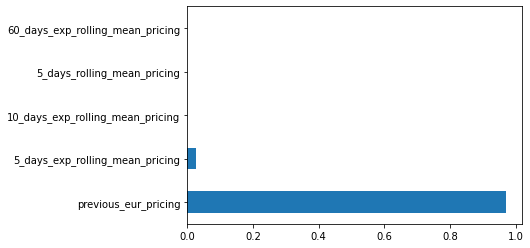

In [324]:
#full model
pd.Series(full_model.feature_importances_, index=predictors.columns).nlargest(5).plot(kind='barh')

<AxesSubplot:>

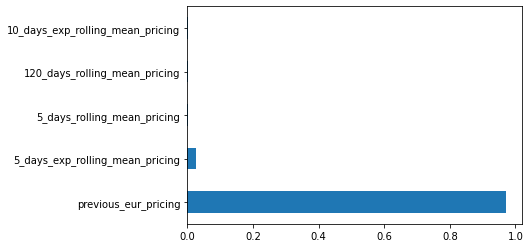

In [325]:
#eur pricing model only
pd.Series(eur_model.feature_importances_, index=predictors_eur_pricing.columns).nlargest(5).plot(kind='barh')

<AxesSubplot:>

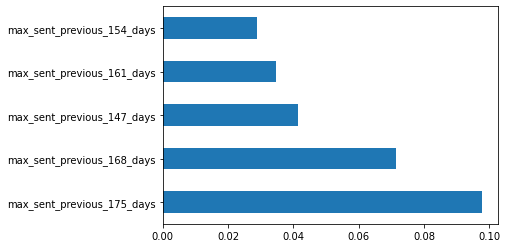

In [326]:
#twitter predictors only
pd.Series(twitter_model.feature_importances_, index=predictors_twitter.columns).nlargest(5).plot(kind='barh')

The price of Euro seems to be very stable, this is why the value of the previous day is very predictive. It can change from 1.2 to 1.1 but with small steps, so it makes sense that information from previous months can be relevant. If there is a negative sentiment during several months, this could increase the probability of have lower pricing in the current day.

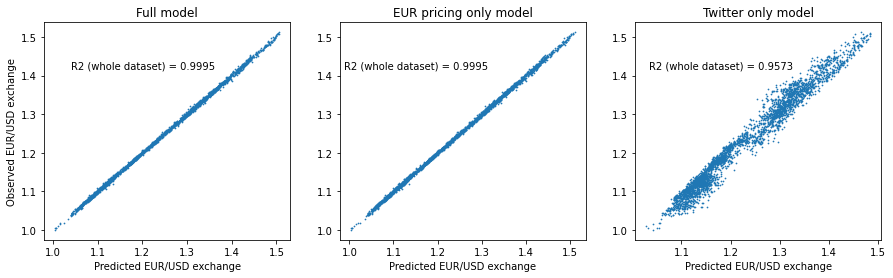

In [327]:
import matplotlib.pyplot as plt
from sklearn import metrics 

#open a plot with two panels
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))

#plot scatter against date and eur pricing
ax1.scatter(x=full_model_pred, y=y, s=0.5)
ax2.scatter(x=eur_model_pred, y=y, s=0.5)
ax3.scatter(x=twitter_model_pred, y=y, s=0.5)

#set titles and axes labels
ax1.title.set_text("Full model")
ax1.set_ylabel("Observed EUR/USD exchange")
ax1.set_xlabel("Predicted EUR/USD exchange")
ax2.title.set_text("EUR pricing only model")
ax2.set_xlabel("Predicted EUR/USD exchange")
ax3.title.set_text("Twitter only model")
ax3.set_xlabel("Predicted EUR/USD exchange")


#add R2
ax1.text(0.40, 0.8, 'R2 (whole dataset) = ' + str(np.round(metrics.r2_score(y, full_model_pred), 4)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(1.51, 0.8, 'R2 (whole dataset) = ' + str(np.round(metrics.r2_score(y, eur_model_pred), 4)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax3.text(2.75, 0.8, 'R2 (whole dataset) = ' + str(np.round(metrics.r2_score(y, twitter_model_pred), 4)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)

#close
plt.show()

The R2 values in the whole dataset are above 0.8, while in the evaluation dataseta are negative, it seems that there is overfitting and it could be caused by random forest, so we are going to optimize parameters. Calculating the change in price is a tougher problem, but it should not be so different between the whole dataset and evaluation datasets.

## Dummy model

Model considering as the current EUR pricing the value of the previous day

In [328]:
from sklearn import metrics 
metrics.r2_score(y, df_merged["previous_eur_pricing"].values)

0.9966667639510449

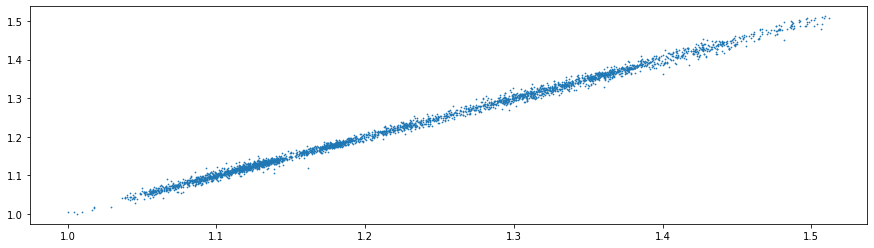

In [329]:
import matplotlib.pyplot as plt
from sklearn import metrics 

#open a plot with two panels
fig, ax1 = plt.subplots(1,1, figsize=(15,4))

#plot scatter against date and eur pricing
ax1.scatter(x=df_merged["previous_eur_pricing"], y=y, s=0.5)


## Grid search with random forest

In [149]:
full_model_grid_search = RandomForestRegressor(random_state=6383287)
eur_model_grid_search = RandomForestRegressor(random_state=6383287)
twitter_model_grid_search = RandomForestRegressor(random_state=6383287)

In [151]:
##use gridsearch to optimize the parameters of the model
#make imports
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, ShuffleSplit

##parameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
    #https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

#make a dict with the parameters and values to be explored
    #https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/
    #https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#shuffle
shuffle_split_grid = ShuffleSplit(n_splits=3, test_size=0.3, random_state=6383287)
    #CHECK IN MORE DETAIL
    #This seems to be equivalent to: 
        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        #But, it is usable for GridSearchCV
       #https://stackoverflow.com/questions/57672955/how-to-use-gridsearchcv-for-tuning-parameters-with-train-test-split-strategy


#prepare the gridsearch with the pipe across these parameter values using 3 cores
#search = GridSearchCV(twitter_model, params, n_jobs=-2, cv=shuffle_split_grid, scoring="r2")
search_full_model = RandomizedSearchCV(full_model_grid_search, params, n_iter=20, cv=shuffle_split_grid, verbose=100, random_state=42, n_jobs=-2, scoring="r2")
search_eur_model = RandomizedSearchCV(eur_model_grid_search, params, n_iter=20, cv=shuffle_split_grid, verbose=100, random_state=42, n_jobs=-2, scoring="r2")
search_twitter_model = RandomizedSearchCV(twitter_model_grid_search, params, n_iter=20, cv=shuffle_split_grid, verbose=100, random_state=42, n_jobs=-2, scoring="r2")
    #we can use random search if we have many parameters, so the total number of combinations of all parameters
        #will be veery high
        #https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
    #for scoring options
        #sklearn.metrics.SCORERS.keys())
        
#make the search for out data
search_full_model.fit(X, y)
search_eur_model.fit(X_eur_pricing, y)
search_twitter_model.fit(X_twitter, y)

#print the best score with 3 decimals
print("Best parameter full model (CV score=%0.3f):" % search_full_model.best_score_)
print("Best parameter eur pricing model (CV score=%0.3f):" % search_eur_model.best_score_)
print("Best parameter twitter model (CV score=%0.3f):" % search_twitter_model.best_score_)

#print the best value of the hyperparameter
print(search_full_model.best_params_)
print(search_eur_model.best_params_)
print(search_twitter_model.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


KeyboardInterrupt: 

In [213]:
search.cv_results_

{'mean_fit_time': array([  3.59586318,  18.67073401, 290.21490057,  30.1193037 ,
        556.72681173,  18.14782095, 981.83149529,   2.82246987,
        254.5312887 , 474.04540793, 132.07625564,  29.09145657,
         28.73645457,  58.70029624,  68.1570398 , 511.19356624,
         25.90761431, 164.48155085, 575.29435587, 297.28621459]),
 'std_fit_time': array([ 0.39065444,  2.56255555,  8.23523576,  1.1622362 , 31.78065441,
         3.32494643, 44.87555461,  0.13089031,  7.47005912, 13.30549566,
         0.99370852,  0.19071284,  0.39132922,  1.00875039,  3.53075678,
        30.4061039 ,  0.18898798,  1.13689793, 14.83050813, 13.12582977]),
 'mean_score_time': array([0.04718486, 0.14725025, 0.25115856, 0.37747105, 0.34497396,
        0.13148204, 0.65540902, 0.04109852, 0.35841028, 0.65248704,
        0.10830768, 0.20637528, 0.33653808, 0.40389864, 0.51257857,
        0.24846403, 0.29247554, 0.22630699, 0.27727   , 0.33932455]),
 'std_score_time': array([0.00026551, 0.01742087, 0.032578

## Modeling with Supporting Vector Machines

In [ ]:
from sklearn.svm import SVR
from sklearn import metrics
print(metrics.r2_score(y, SVR(kernel="linear", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1).fit(X_twitter, y=y).predict(X=X_twitter)))
#https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
#https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py

In [12]:
from sklearn.svm import SVR
from sklearn import metrics
print(metrics.r2_score(y, SVR(kernel="rbf", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1).fit(X_eur_pricing, y=y).predict(X=X_eur_pricing)))
print(metrics.r2_score(y, SVR(kernel="rbf", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1).fit(X_twitter, y=y).predict(X=X_twitter)))

0.09170057298424283
0.9701505348419782


In [34]:
#create 5 training-evaluation splits
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.25, random_state=6383287)

In [39]:
#full model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, ShuffleSplit
average_r2_full_model = np.mean(cross_val_score(estimator=SVR(kernel="rbf"), 
                                                X=X, 
                                                y=y, 
                                                cv=shuffle_split, 
                                                scoring="r2", 
                                                n_jobs=5))
f"Average R2 of the full model on 5 evaluation sets: {average_r2_full_model}"

'Average R2 of the full model on 5 evaluation sets: 0.6612569308797338'

In [42]:
#only twitter
from sklearn.model_selection import cross_val_score, ShuffleSplit
average_r2_twitter_model = np.mean(cross_val_score(estimator=SVR(kernel="rbf"), 
                                                X=X_twitter, 
                                                y=y, 
                                                cv=shuffle_split, 
                                                scoring="r2", 
                                                n_jobs=5))
f"Average R2 of the twitter-only model on 5 evaluation sets: {average_r2_twitter_model}"



'Average R2 of the twitter-only model on 5 evaluation sets: -0.007476766494548226'

In [43]:
#only eur pricing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
average_r2_eur_model = np.mean(cross_val_score(estimator=SVR(kernel="rbf"), 
                                                X=X_eur_pricing, 
                                                y=y, 
                                                cv=shuffle_split, 
                                                scoring="r2", 
                                                n_jobs=5))
f"Average R2 of the eur pricing-only model on 5 evaluation sets: {average_r2_eur_model}"

'Average R2 of the eur pricing-only model on 5 evaluation sets: 0.024817168378046216'

## Notes about current state

- After the presentation I did, I have compared the null model with only pricing data and the twitter augmented model using cross validation. Basically, I have made 5 splits of the data in and calculated the mean R2 in the evaluation dataset. Using this approach, the Twitter is still much better than the null model (1-5%), but the problem is that the R2 values are negative in both models when predicting in the evaluation datasets! Twitter improves, but the models are very bad! R2 is around 0.83 when predicting in the whole dataset. Maybe there is overfitting, but I have reduced the predictors selecting those with more importance, and I get similar results. This was predicting the change of the Euro value in percentage and I have used linear models, random forest, decision trees, supporting vector machines and neural networks testing different parameters.

- So I have come back to the prediction of just the eur pricing. Here, using cross validation I found that the Twitter model as good as the null model. One problem I see with this approach is that the null model is almost perfect, with an R2 of 0.995 0.998. So I decided to check what happens using just twitter sentiment. 

- A model using the sentiment of twitter (including a moving calculation of mean, median, etc..) get an R2 of 0.99 also!! maybe 0.993 or 0.994 using cross validation!! To me this is a very interesting result. Yes, I have not surpassed the pricing model, but I am there just using Twitter! One could say that chanages in pricing influence the sentiment of twitter, so the pricing is already there, but it is too high R2 for a predictor that does not include the actual pricing values of the previous days. 

- In addition, what would happen in a situation of uncertainty? Maybe there twitter is faster, and dected changes in the expectations of economic agents before an actual change in the pricing. Also, what about other currencies that are less stable? maybe twitter sentiment can surpass previous pricing in these scenarios. 

- I think a company could use my approach on searching for topics relevant for the price of a currency and use them in machine learning framework to improve their currency predictions. Do you think this is good enough for the capstone?

- Comments Robert
    - check data leak
        - shuffle columns and see if the model still behaves well
    - use cross validation with temporal data can mix data? but I have in each row the value of the corresponding previous days
    - min_sample leaf (2,200,), min split
    - null model using just the exact previous value as prediction?
        - try to do it in evaluation also?


### Next steps

- think a little bit more options to 
    - if you include previous eur value plus averages, you get 0.9958, close to 0.9961, check this.
        - prueba usar value of euro 7 days befores... without averages.... wichd would be equivalanted to twitter
        - increase the number of summary statistics?
        - grid search for each model?
    - improve the model with twitter for eur pricing
    - model change of EUR value using only previous pricing and twitter predictors, see what happens
    - add neural netwroks in a last section about the work you did but it did not work
- detail the project in the readme file
    - what done, results, outline linking notebooks for detials, results ... read.md
- the target is techincal, so do no explain machine learning, but not go too tecincial.. semi-techinal. This can be useful for someone using prediction of currency in sales prediction. Anyone interested in predicting currency can be interested on this, on including this approach in their model. Maybe more useful in less stable currencies?

- check moving averages
    - check that no eur pricing data is used in these calculations!!!
    - they consider the current day euro and sentiment value?
- using only previous eur pciing and sentiment of the previous day, I get a 0.1% of improvement, lets see wthat happens with the new moving variavles from the previous,, not ucrrent 
- ADD RANDOM NOISE OR ERROR TO SE WHAT HAPPENS WITH THE MODELS
- read:
    - The predictive power of public Twitter sentiment for forecasting cryptocurrency prices
        - INTERESTING APPROACH TO CLEAN TWEETS AND THEN APPLY VADER
        - https://towardsdatascience.com/basic-tweet-preprocessing-in-python-efd8360d529e
- Extend to other currencies?